In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fake_news = pd.read_csv('C:\\Users\\ac110\\OneDrive\\Desktop\\Projects\\Detecting-Fake-News-with-NLP\\Data\\Fake.csv')
true_news = pd.read_csv('C:\\Users\\ac110\\OneDrive\\Desktop\\Projects\\Detecting-Fake-News-with-NLP\\Data\\True.csv')

In [4]:
#Printing Fake News from csv file 
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
#Printing True News from csv file
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# Processing Data

# Adding indicators of true or Fake
fake_news['isTrue'] = 0
true_news['isTrue'] = 1 

# Combining both the datasets 
df = pd.concat([fake_news, true_news], axis = 0)


# Removing unnecessary colunns
df = df.drop(['title', 'subject', 'date'], axis = 1)


# Printing it 
df.head()

,text,isTrue
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


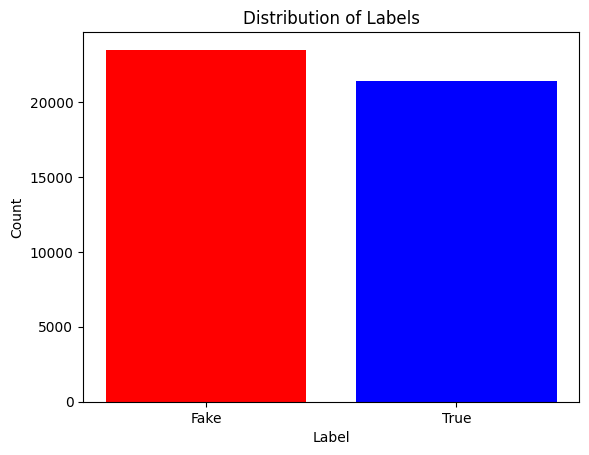

In [7]:
# Trying to Visualize the data
label_counts = df['isTrue'].value_counts()  # Update with the correct column name
plt.bar(label_counts.index, label_counts.values, color=['red', 'blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['Fake', 'True'])
plt.show()

In [8]:
# Cleaning text to remove unwanted strings
import re
import string
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]|\W|https?://\S+|www\.\S+|<.*?>+|\n|\w*\d\w*', '', text)
    return text

df["text"] = df["text"].apply(preprocess_text)

In [9]:
# Preparinf data for Modeling
x = df["text"]
y = df["isTrue"]

In [10]:
! pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Dividing the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [12]:
# Converting the data into vector before training the model 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lr)

ValueError: could not convert string to float: 'ankarareutersturkishauthoritiessummonedausconsulateworkertotestifyonmondayoverhisrelativesallegedlinkstolastyearsfailedcoupattemptstaterunanadolunewsagencysaiddaysafterthearrestofanotherconsulateemployeeanadolusaidthesuspectwaswantedforquestioningafterhiswifeanddaughterweredetainedintheblackseacityofamasyaitdidnotsaywhetherhehadcompliedwiththesummonsthemanswifeanddaughterweredetainedoverallegedlinkstothenetworkofusbasedclericfethullahgulenanadolusaidblamedbyankarafororchestratingtheabortiveputschthetwowerelaterbroughttoistanbulforlegalproceduresitsaidusconsulateworkernmchusbandandfatherofthesuspectsinquestionhasnodiplomaticimmunityandhasbeencalledtotheprosecutorsofficetotestifyanadoluquotedastatementfromtheistanbulprosecutorsofficeassayingonsundaytheusmissioninturkeyandtheturkishmissioninwashingtoncutbackvisaservicesaftermetintopuzausconsulateemployeewasarrestedinturkeylastweekwashingtonsaidthechargeslinkinghimtogulenwerebaselesstheprosecutorsofficesaidthattestimonyfromtopuzpointedtothetwosuspectsdetainedinamasyabeinghighrankingmembersofgulensnetworkgulenhasdeniedanyroleinthefailedcoup'